In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1000 samples of uniform distribution on interval [0,1]

In [3]:
x = np.random.uniform(0, 1, 1000)

1000 samples of normal distribution with mean μ=0 and standard deviation σ=1, mean μ=0 and standard deviation σ=10.

In [4]:
ndist_1 = np.random.normal(0, 1, 1000)
ndist_2 = np.random.normal(0, 10, 1000)

1000 samples of beta distribution for the following pairs of parameters (α,β)∈(1,1),(2,2),(3,9)

In [5]:
beta_dist_1 = np.random.beta(1, 1, 1000)
beta_dist_2 = np.random.beta(2, 2, 1000)
beta_dist_3 = np.random.beta(3, 9, 1000)

10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices
```math
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
```

```math
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}
```

In [6]:
mean = [0, 0]
cov1 = [[1, 0], [0, 1]]
cov2 = [[2, 1], [1, 2]]
xm1, ym1= np.random.multivariate_normal(mean, cov1, 10000).T
xm2, ym2 = np.random.multivariate_normal(mean, cov2, 10000).T

For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions.

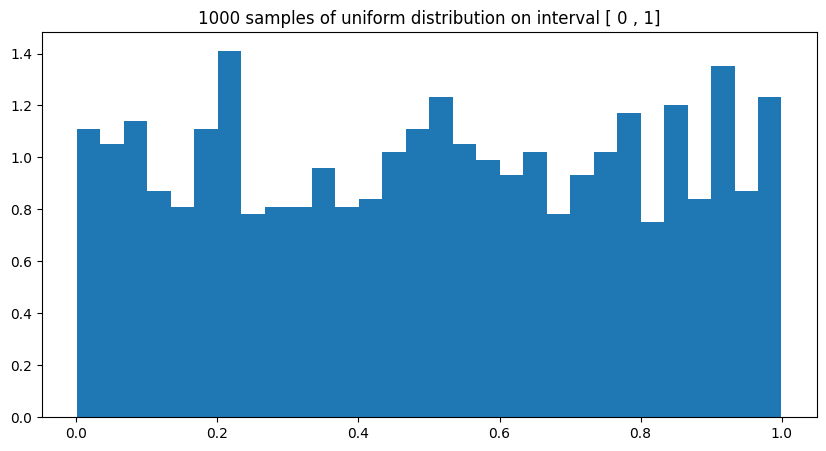

In [7]:
plt.figure(figsize=(10, 5))
plt.title('1000 samples of uniform distribution on interval [ 0 , 1]')
plt.hist(x, 30, density=True)
plt.show()

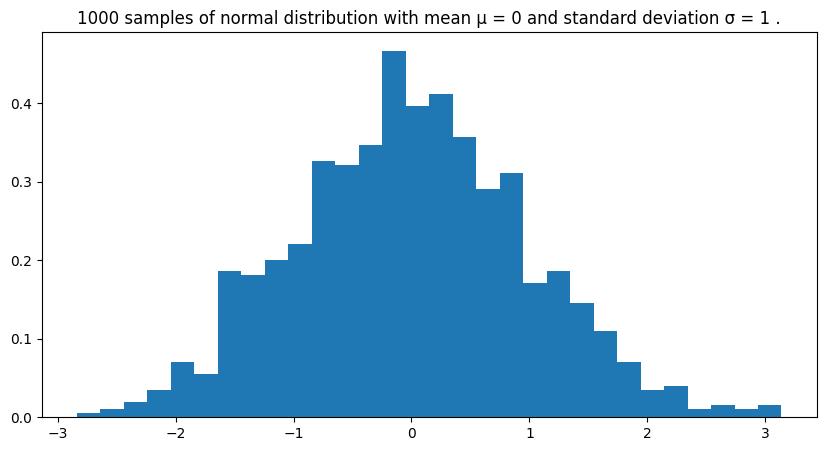

In [8]:
plt.figure(figsize=(10, 5))
plt.title('1000 samples of normal distribution with mean μ = 0 and standard deviation σ = 1 .')
plt.hist(ndist_1, 30, density=True)
plt.show()

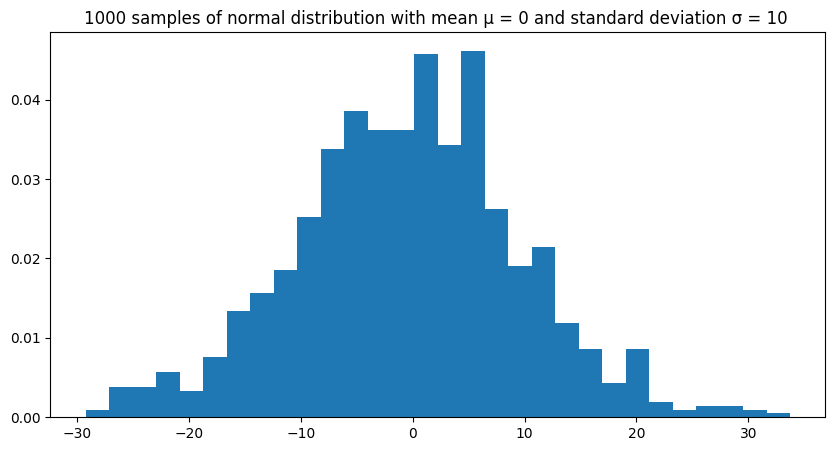

In [9]:
plt.figure(figsize=(10, 5))
plt.title('1000 samples of normal distribution with mean μ = 0 and standard deviation σ = 10 ')
plt.hist(ndist_2, 30, density=True)
plt.show()

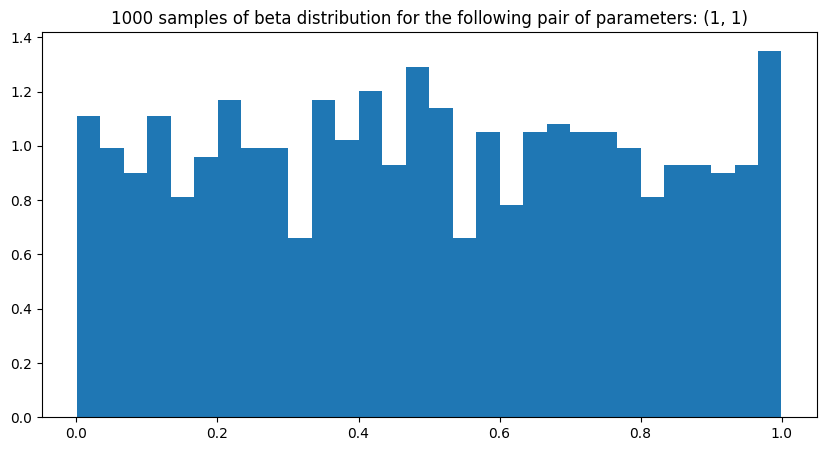

In [10]:
plt.figure(figsize=(10, 5))
plt.title('1000 samples of beta distribution for the following pair of parameters: (1, 1)')
plt.hist(beta_dist_1, 30, density=True)
plt.show()

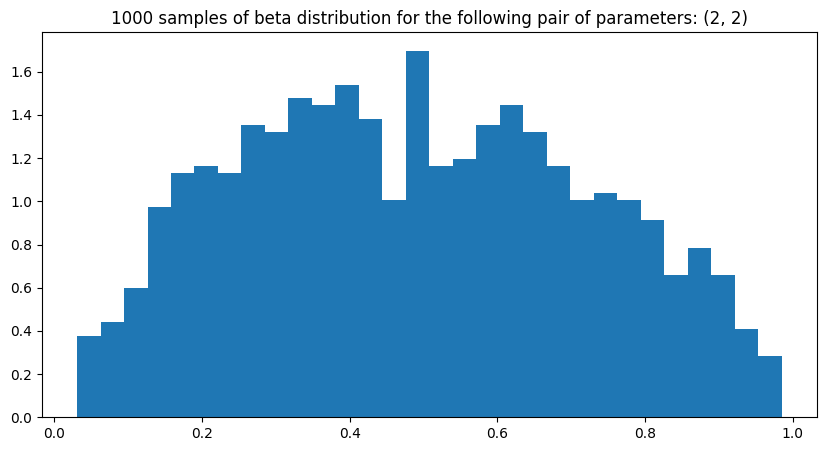

In [11]:
plt.figure(figsize=(10, 5))
plt.title('1000 samples of beta distribution for the following pair of parameters: (2, 2)')
plt.hist(beta_dist_2, 30, density=True)
plt.show()

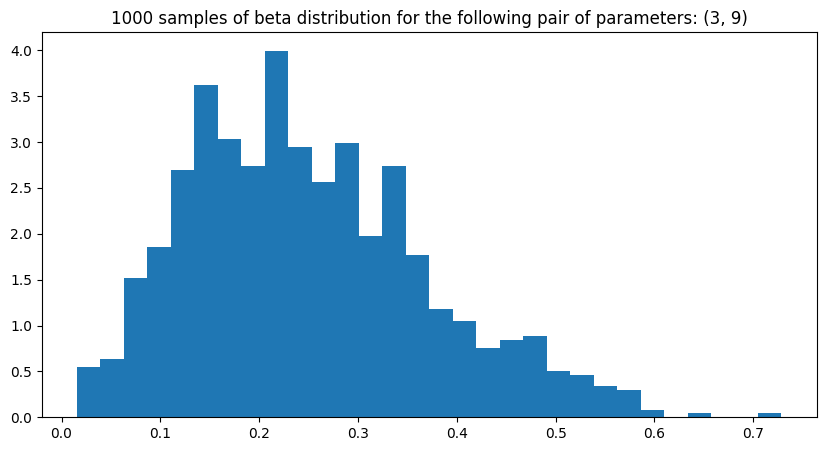

In [12]:
plt.figure(figsize=(10, 5))
plt.title('1000 samples of beta distribution for the following pair of parameters: (3, 9)')
plt.hist(beta_dist_3, 30, density=True)
plt.show()

For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).

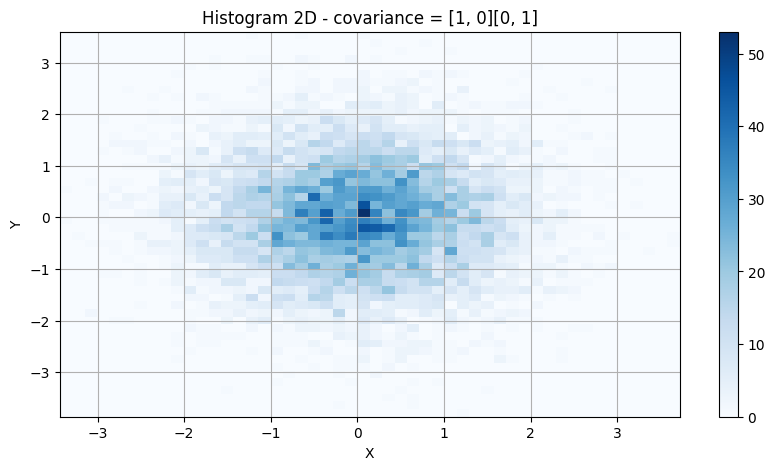

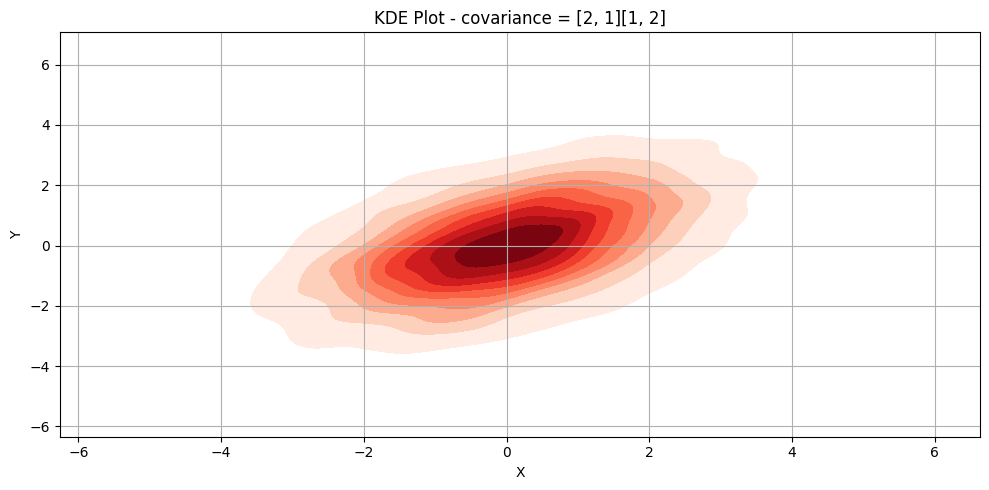

In [16]:
plt.figure(figsize=(10,5))
plt.hist2d(xm1, ym1, bins=50, cmap='Blues')
plt.colorbar()
plt.title("Histogram 2D - covariance = [1, 0][0, 1]")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

plt.figure(figsize=(10,5))
sns.kdeplot(x=xm2, y=ym2, fill=True, cmap='Reds')
plt.title("KDE Plot - covariance = [2, 1][1, 2]")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

plt.tight_layout()
plt.show()

Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
```math
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
``` 

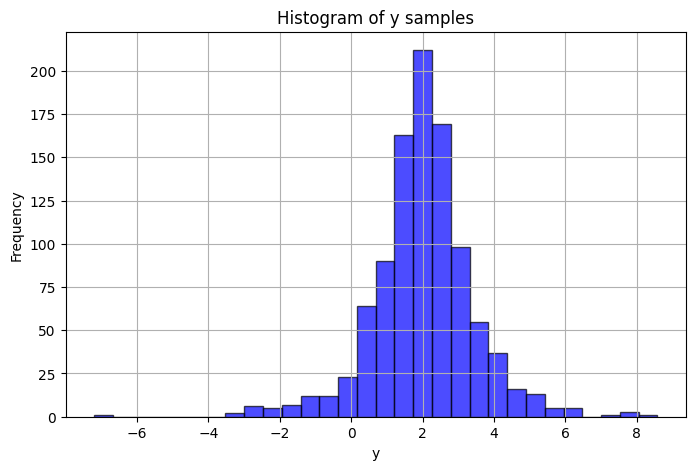

In [17]:
num_samples = 1000

alpha = np.random.normal(2, 0.1, num_samples)
beta = np.random.normal(0.2, 0.2, num_samples)
x = np.random.normal(0, 3, num_samples)
sigma = np.abs(np.random.normal(0, 1, num_samples))  # HalfNormal

mu = alpha + beta * x

y = np.random.normal(mu, sigma)

plt.figure(figsize=(8, 5))
plt.hist(y, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y samples')
plt.grid()
plt.show()

Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot). 

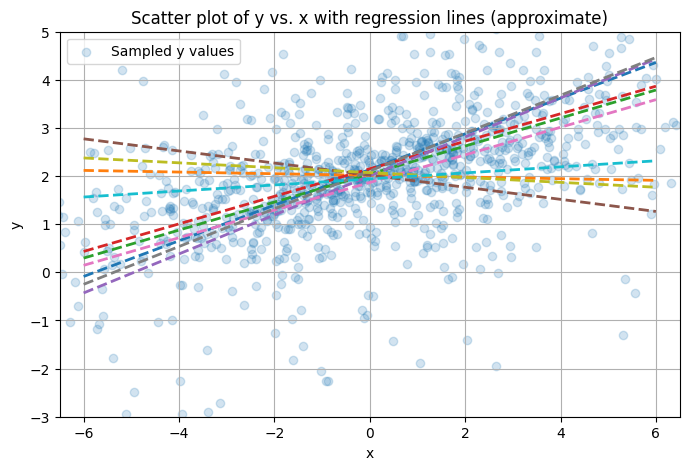

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.2, label='Sampled y values')

# Linie regresji dla losowych próbek alpha, beta
x_line = np.linspace(-6, 6, 100)
for i in np.random.choice(num_samples, size=10, replace=False):
    y_line = alpha[i] + beta[i] * x_line
    plt.plot(x_line, y_line, alpha=1, linestyle='--', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-6.5, 6.5)
plt.ylim(-3, 5)
plt.title('Scatter plot of y vs. x with regression lines (approximate)')
plt.legend()
plt.grid()
plt.show()